In [1]:
import pandas as pd
import fastai.text as ftxt
import sklearn.model_selection as skms
import numpy as np
import spacy as sp
import pickle
import os

In [2]:
path = os.getcwd()
path

'/media/rinnely/Archer/ENES/Stance/legal_abortion'

In [3]:
path = os.getcwd()
topic = 'la'
os.makedirs(path+'/NN/'+ topic, exist_ok=True)
path_nn_model= path+'/NN/'+topic
path_nn_model

'/media/rinnely/Archer/ENES/Stance/legal_abortion/NN/la'

In [4]:
tweets = pd.read_csv(path+'/alldata_nouser.csv')

In [5]:
test = tweets[['Stance', 'Tweet']][:933]

In [6]:
test.tail()

,Stance,Tweet
928,0,USER USER I followed him before I watched huma...
929,-1,"For he who avenges blood remembers, he does no..."
930,-1,Life is sacred on all levels. Abortion does no...
931,-1,"USER U refer to ""WE"" which =""YOU"" & a minority..."
932,-1,Al Robertson's mom #DuckDynasty chose life as ...


In [7]:
train = tweets[['Stance', 'Tweet']][933:]

In [8]:
train.head(), train.shape

(     Stance                                              Tweet
 933      -1      Celebrating the life. Not mourning the death.
 934      -1  mt USER: women are not ragdolls. they can prac...
 935      -1  check out some #prolife news in #2017 from #th...
 936      -1  what being a mother has taught me about abortion:
 937      -1  gop to #defundplannedparenthood in #obamacare ..., (3089, 2))

In [9]:
train.shape, test.shape

((3089, 2), (933, 2))

In [10]:
# train.to_csv(path_nn_model+'/train_tweetsAuto.csv', index=False)
# test.to_csv(path_nn_model+'/test_tweetsManual.csv', index=False)

In [11]:
train = pd.read_csv(path_nn_model+'/train_tweetsAuto.csv')
test = pd.read_csv(path_nn_model+'/test_tweetsManual.csv')

In [12]:
data_lm = ftxt.TextLMDataBunch.from_df(path_nn_model, train, test, bs=32)
data_clas = ftxt.TextClasDataBunch.from_df(path_nn_model, train, test, vocab=data_lm.train_ds.vocab, bs=32)

In [13]:
data_lm.show_batch()

idx,text
0,"living that xxunk life . we will ! xxbos abortion ends one life , and forever adversely alters another . xxbos # xxunk i 'm a special gift from god , love me mommy . xxbos xxunk tebow # chooselife . her story continues to inspire many , "" mrs . tebow , i did not abort my baby because you did not abort yours . "" xxbos of all"
1,up for life ! xxbos unreal how a films about xxunk and xxunk can make ye feel so fucking proud eh being scottish xxbos saw xxup user tonight absolutely brilliant - go see ! xxbos just xxunk first xxunk in about a week . it 's xxunk hard . but at least the baby stopped xxunk on the ceiling . xxbos such an amazing experience with all my sisters xxbos
2,"at # xxunk . taking xxup user head on . xxbos if theres a xxunk , theres life . national xxbos it 's true . a friend can save a life ! xxbos hundreds of thousands of # xxunk xxunk in washington 2017 march ! ! xxbos mt xxup user : new mood , new plan . let america decide ! xxbos mt xxup user : for convenience ... xxbos"
3,for your dedication to life ! xxbos xxunk tae see trainspotting live again ! xxbos did senator xxunk xxunk xxunk xxunk that abortion takes human life ? xxbos are you a part of the # xxunk ? do you wish to become a # prolifeyouth blogger ? apply today ! xxbos # prolifegen news : xxunk xxunk is still a thing xxbos four xxunk ways to argue about xxbos xxunk
4,"# plannedparenthood with 196,543 baby socks xxbos i was xxup user for the tech xxunk and a great show of # xxunk by xxup user yesterday . check it out this week ! xxbos mt xxup user : we the people end abortion america ! xxbos for every child aborted there are 2 families willing to adopt it xxbos a beautiful piece . well done , sir xxup user xxbos"


In [14]:
data_clas.show_batch()

text,target
"xxbos xxwrep 4 xxup user # xxunk & & # xxunk knew the # aca , # xxunk , # scotus , # civilrights , # lgbtq & & women 's repro health was on the line & & they did n't care !",0
"xxbos doc : john , we think you have a xxunk of # marriage . do you know what the xxunk are ? john : ca n't say i do . doc : that 's one of them , yes .",0
xxbos wife : you pick dinner me : burger wife : no me : xxunk wife : no me : xxunk wife : no . me : what do you want wife : it 's up to you,0
"xxbos xxup user one of my friend 's sisters was told her baby would have # xxunk & & to # abort . she chose # life & & the baby , did not have xxunk ! !",-1
"xxbos i 'm thrilled xxup user is reading & & xxunk my # scotus xxunk , al - xxunk - she xxunk it on xxup user - coming out 3 / 1 / 17 . thanks !",0


In [15]:
data_lm.save(path_nn_model+'/data_lm.pkl')
data_clas.save(path_nn_model+'/data_clas.pkl')

In [16]:
data_lm.train_ds.vocab.itos[:10], len(data_lm.train_ds.vocab.itos)

(['xxunk',
  'xxpad',
  'xxbos',
  'xxeos',
  'xxfld',
  'xxmaj',
  'xxup',
  'xxrep',
  'xxwrep',
  '#'],
 3096)

In [17]:
learnm = ftxt.language_model_learner(data_lm, arch=ftxt.AWD_LSTM, drop_mult=.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.75E-02
Min loss divided by 10: 7.59E-02


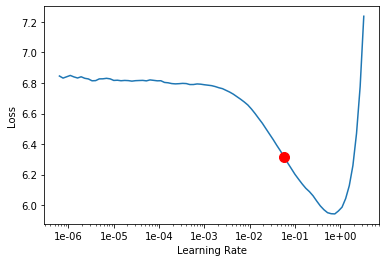

In [18]:
learnm.lr_find(); learnm.recorder.plot(suggestion=True)

In [19]:
learnm.fit_one_cycle(3,5.8e-02)

epoch,train_loss,valid_loss,accuracy,time
0,5.398928,4.673903,0.209241,00:05
1,4.593210,4.761328,0.200491,00:05
2,4.003566,4.754309,0.205223,00:05


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-06
Min loss divided by 10: 3.98E-03


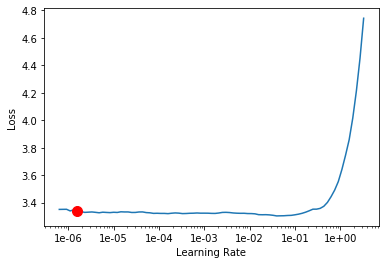

In [20]:
learnm.lr_find(); learnm.recorder.plot(suggestion=True)

In [21]:
learnm.fit_one_cycle(3,3e-06)

epoch,train_loss,valid_loss,accuracy,time
0,3.340272,4.753496,0.205446,00:05
1,3.321508,4.754630,0.205938,00:05
2,3.322744,4.758083,0.206384,00:05


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06
Min loss divided by 10: 6.92E-03


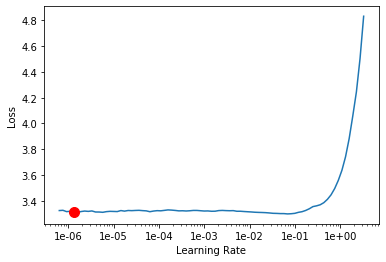

In [22]:
learnm.lr_find(); learnm.recorder.plot(suggestion=True)

In [24]:
learnm.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,3.314865,4.742172,0.207009,00:05
1,3.292644,4.724329,0.208929,00:05
2,3.241560,4.725444,0.210714,00:05
3,3.193716,4.737849,0.208036,00:05
4,3.154845,4.736206,0.208973,00:05


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06
Min loss divided by 10: 2.29E-07


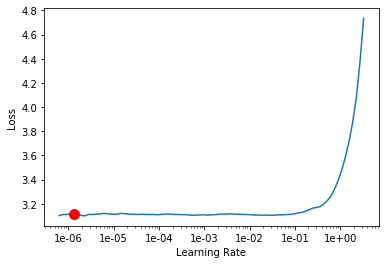

In [25]:
learnm.lr_find(); learnm.recorder.plot(suggestion=True)

In [26]:
learnm.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,3.110397,4.738256,0.208661,00:05
1,3.107170,4.735751,0.207679,00:05
2,3.093541,4.743315,0.207634,00:05
3,3.060248,4.761800,0.208839,00:05
4,3.031296,4.770989,0.205268,00:05
5,3.001257,4.792587,0.204955,00:05
6,2.960106,4.792077,0.204330,00:05
7,2.931070,4.804328,0.204152,00:05
8,2.901459,4.806229,0.204286,00:05
9,2.894068,4.807046,0.203884,00:05


In [27]:
learnm.save_encoder(path_nn_model+'/ml_encoderAM')

In [28]:
learnm.save('la-modelAM')

In [29]:
learn = ftxt.text_classifier_learner(data_clas, ftxt.AWD_LSTM, drop_mult=0.6)

In [30]:
learn.load_encoder(path_nn_model+'/ml_encoderAM')
learn.metrics=[ftxt.accuracy, ftxt.FBeta(average='micro')]

In [31]:
learn.save('learner-1stage')

In [32]:
learn.load('learner-1stage');

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.59E-07
Min loss divided by 10: 4.37E-02


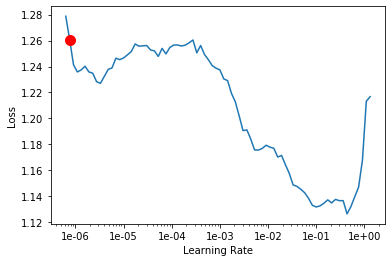

In [33]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [34]:
learn.fit_one_cycle(10,7.6e-07,moms=(0.7, 0.8))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,1.264889,1.132923,0.344051,0.344051,00:04
1,1.246755,1.116555,0.365488,0.365488,00:04
2,1.255157,1.123258,0.352626,0.352626,00:04
3,1.259554,1.105790,0.387996,0.387996,00:04
4,1.252830,1.109080,0.374062,0.374062,00:04
5,1.234071,1.123481,0.350482,0.350482,00:04
6,1.254282,1.121956,0.360129,0.360129,00:04
7,1.242943,1.115341,0.369775,0.369775,00:04
8,1.244526,1.113364,0.371919,0.371919,00:04
9,1.255499,1.108292,0.375134,0.375134,00:04


epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-02
Min loss divided by 10: 2.09E-02


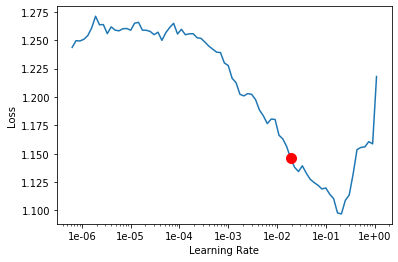

In [35]:
learn.freeze_to(-2)
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [36]:
learn.fit_one_cycle(5,2e-02, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.915254,1.226694,0.378349,0.378349,00:05
1,0.782867,1.146100,0.440514,0.440514,00:04
2,0.648296,1.022641,0.535906,0.535906,00:04
3,0.544718,1.036040,0.551983,0.551983,00:05
4,0.469540,1.053244,0.546624,0.546624,00:04


epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.10E-06
Min loss divided by 10: 5.75E-07


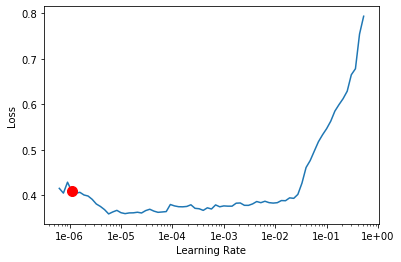

In [37]:
learn.freeze_to(-3)
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [38]:
learn.fit_one_cycle(5,1e-06,moms=(0.7, 0.8))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.402087,1.048619,0.550911,0.550911,00:08
1,0.429617,1.043037,0.548767,0.548767,00:07
2,0.430880,1.071826,0.545552,0.545552,00:07
3,0.427456,1.046995,0.550911,0.550911,00:08
4,0.419684,1.056822,0.547696,0.547696,00:07


epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.10E-03


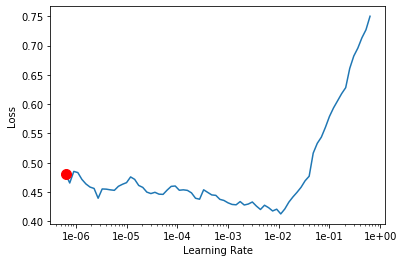

In [39]:
learn.unfreeze()
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [40]:
learn.fit_one_cycle(5,moms=(0.7, 0.8))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.399188,1.166359,0.520900,0.520900,00:10
1,0.367765,1.120177,0.563773,0.563773,00:10
2,0.329112,1.126433,0.563773,0.563773,00:09
3,0.288504,1.181359,0.573419,0.573419,00:09
4,0.266189,1.211392,0.563773,0.563773,00:10


epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Failed to compute the gradients, there might not be enough points.


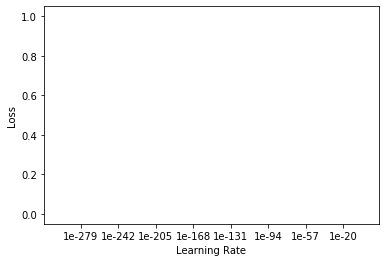

In [42]:
learn.lr_find(); learn.recorder.plot(suggestion=True)

In [85]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.567711,1.163515,0.422294,0.422294,00:10
1,0.514231,1.095180,0.482315,0.482315,00:09
2,0.449587,1.140735,0.479100,0.479100,00:09
3,0.401403,1.189815,0.496249,0.496249,00:09
4,0.333391,1.204838,0.515541,0.515541,00:09
5,0.256285,1.298396,0.527331,0.527331,00:10
6,0.238252,1.362615,0.510182,0.510182,00:09
7,0.190204,1.327605,0.515541,0.515541,00:09
8,0.176544,1.385962,0.518757,0.518757,00:09
9,0.165022,1.412537,0.514469,0.514470,00:10


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


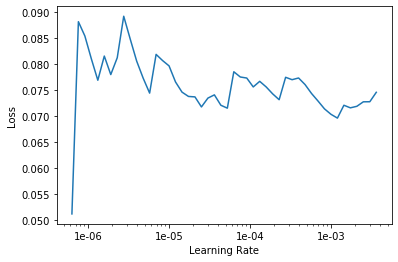

In [61]:
learn.lr_find(); learn.recorder.plot()

In [62]:
learn.fit_one_cycle(15,moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.073561,1.181819,0.626667,0.626667,00:04
1,0.086489,1.208847,0.640000,0.640000,00:04
2,0.076092,1.212426,0.620000,0.620000,00:01
3,0.076359,1.267633,0.613333,0.613333,00:01
4,0.077932,1.316755,0.593333,0.593333,00:01
5,0.074365,1.414496,0.600000,0.600000,00:01
6,0.072296,1.534045,0.593333,0.593333,00:01
7,0.069676,1.517587,0.573333,0.573333,00:01
8,0.070126,1.531858,0.586667,0.586667,00:01
9,0.069747,1.518744,0.586667,0.586667,00:01


In [45]:
preds, y, losses = learn.get_preds(with_loss=True)
interp = ftxt.TextClassificationInterpretation(learn, preds, y, losses)

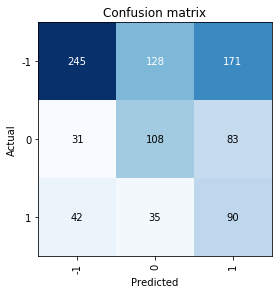

In [46]:
interp.plot_confusion_matrix()